In [8]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

### Agenda
- Statistics
    - Distribution, Hypo testing, Application
    - T-Test -> Basics, formuals, implement, apply in ML/EDA
- Today
    - Central limit theorem
    - Normal distribution
    - Confidence interval
    - Probability of estimates
    - T-Test
    - Apply T-test on any data
    - T-Test is helpful in Linear Regression

### Data Types
- Categorical (fewer values)
    - binary class/ Multi class
- Numerical values
    - Discrete
    - Continuous
- T-Test
    - Whether marks is influenced by Gender (binary categorical)? 

### Random Variables

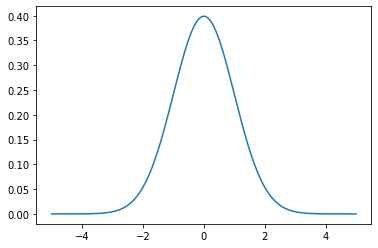

In [9]:
x = np.linspace(-5, 5, 1000)
sigma = 1
mu = 0
norm = lambda x: (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x*x)
x_norm = [norm(i) for i in x]
plt.plot(x, x_norm)

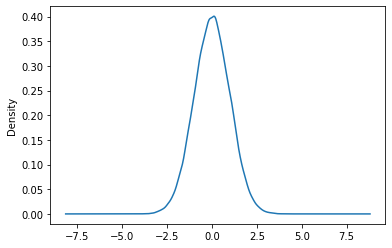

In [24]:
mu=0
sigma = 1
n = 100000
sample = np.random.normal(loc=mu, scale=sigma, size=n)
sample = pd.Series(sample)
sample.plot.kde()

In [27]:
sample[sample<=mu].shape[0] / sample.shape[0] * 100

49.855

In [7]:
r = []
for i in range(10):
    r.append(i*i)

r = [i*i for i in range(10)]
r

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [33]:
sample[(sample>mu) & (sample<sigma)].shape[0] / sample.shape[0]

0.34108

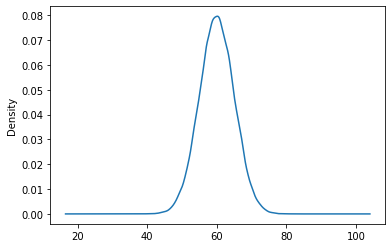

In [52]:
mu = 60
sigma = 5
n = 100000
sample = np.random.normal(loc=mu, scale=sigma, size=n)
sample = pd.Series(sample)
sample.plot.kde()

In [51]:
sample[sample<65].shape[0] / sample.shape[0]

0.84173

In [54]:
st.norm(0,1).cdf(1)

0.8413447460685429

In [53]:
st.norm(60, 5).cdf(65)

0.8413447460685429

In [ ]:
## Exercise
## generate random samples with mu=50, sigma=10
## P(45<x<55)

In [55]:
#P(45<x<55)

In [57]:
mu = 50
sigma = 10
dist = st.norm(mu, sigma)
dist.cdf(55) - dist.cdf(45)

0.38292492254802624

In [58]:
#p(x>65)
1 - dist.cdf(65)

0.06680720126885809

In [59]:
# mu=0, sigma=1
st.norm().ppf(0.5)

0.0

In [67]:
st.norm(0,1).ppf(0.975)

1.959963984540054

In [77]:
mu = 50
sigma = 5
n= 10000

dist = st.norm(mu, sigma)
dist.ppf(0.005), dist.ppf(1-0.005)

(37.1208534822555, 62.8791465177445)

In [ ]:
# 95% of the values in the above distribution will be between 40.2<->59.8

In [75]:
sample = np.random.normal(loc=mu, scale=sigma, size=n)
sample[(sample>40.2) & (sample<=59.8)].shape[0] / sample.shape[0]

0.9491

In [ ]:
# temp=25 +/- 3
# temp = 25 +/- 10 ---> 15<->35
# 95, 98, 99

In [ ]:
# m -> m-3 <---> m+3-- Confidence interval
# c ->

In [78]:
### Normal distribution X ~ (mu, sigma2)
### given a x value, how to calculate P(x<c), P(x>c), P(c1<x<=c2)
### Given Probabilty, mu, sigma -- > X
### Intervals of x

### Central Limit Theorem

##### combine multiple distributions (any) -> normal distribution, if sample size is large

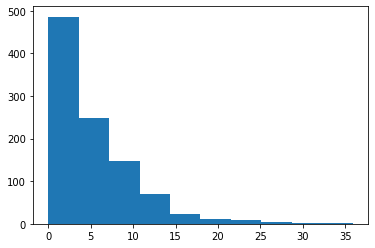

In [103]:
sample_unif = np.random.exponential(scale=5, size=1000)
plt.hist(sample_unif);

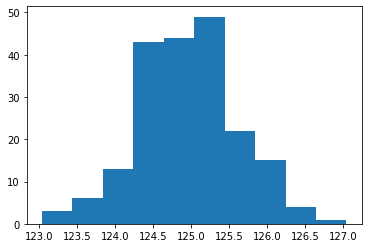

In [101]:
n = 500
mean_all = []
for i in range(200):
    sample_unif = np.random.uniform(low=100, high=150, size=n)
    mean_all.append(sample_unif.mean())
plt.hist(mean_all);

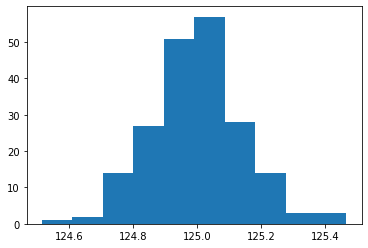

In [114]:
population_size = 100000
population  = pd.Series(np.random.exponential(scale=5,
                                              size=population_size))

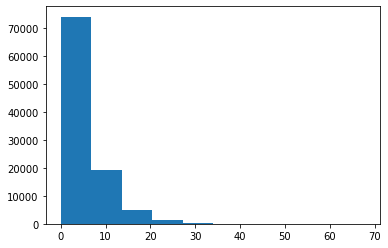

In [123]:
plt.hist(population);

In [120]:
n = 1000
mean_all = []
for i in range(400):
    sample = population.sample(n)
    mean_all.append(sample.mean())

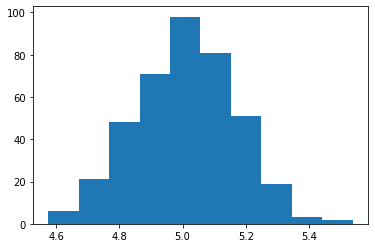

In [121]:
plt.hist(mean_all);

In [132]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/insurance.csv'
insurance = pd.read_csv(url)
insurance['expenses'].mean()

13270.422414050803

In [ ]:
population

In [131]:
for i in range(5):
    sample_mean = insurance['expenses'].sample(100).mean()
    print(sample_mean)

14166.7945
13735.202800000003
12474.5272
12570.4074
14084.862800000004


In [130]:
## Sample mean => Random variable ~ Normal Distribution(mean, variance)

In [134]:
mu = insurance['expenses'].mean()
sigma = insurance['expenses'].std()
mu, sigma

(13270.422414050803, 12110.011239706457)

In [136]:
sample = insurance['expenses'].sample(100)
sample_mean = sample.mean()
sample_sigma = sample.std()
sample_mean, sample_sigma

(13428.6154, 11885.74448694546)

In [ ]:
# sample mean is an estimate of population mean
# sample mean is also termed as point estimator

#### Calculating mean of sample means
- create a population using uniform distribution
    - np.random.uniform(low=100, high=150, size=100000)
    - report population mean
- For each sample (totally 200 samples)
    - sample: n=1000
    - calculate sample mean
- Get the distribution of sample means
- Calculate mean of sample means

In [168]:
np.random.seed(1)
population = np.random.uniform(low=100, high=150, size=100000)
population.mean()

124.96095567007927

In [173]:
np.random.seed(1)
n = 10000
sample_means = []
for i in range(200):
    sample = pd.Series(population).sample(n)
    sample_means.append(sample.mean())
mean_of_sample_mean = np.mean(sample_means)
mean_of_sample_mean

124.96074293502052

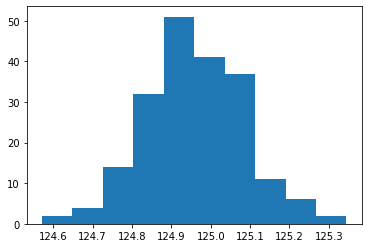

In [175]:
plt.hist(sample_means);